In [1]:
import pandas as pd
g = pd.read_csv("bilpriser.csv")#reading data
g

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


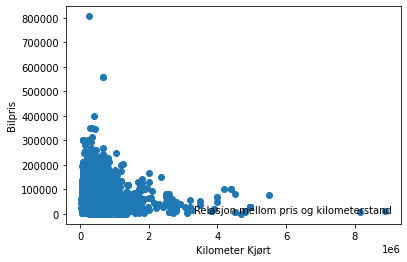

In [2]:
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Bilpris')
ax.set_xlabel('Kilometer Kjørt')

#plotting the function:
ax.scatter(g['selling_price'], g['km_driven'],  label='Relasjon mellom pris og kilometerstand')
ax.legend(loc='lower right',frameon=False)

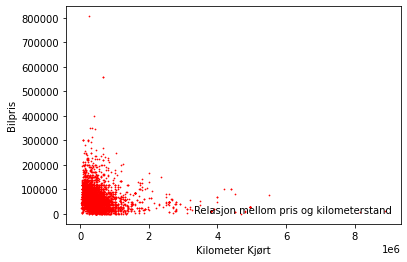

In [3]:
import numpy as np

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('Bilpris')
ax.set_xlabel('Kilometer Kjørt')

#plotting the function:
ax.scatter(g['selling_price'], g['km_driven'], s=0.5, c = 'red', label='Relasjon mellom pris og kilometerstand')
ax.legend(loc='lower right',frameon=False)

In [4]:
y=g['km_driven']
pd.DataFrame(y)

,km_driven
0,70000
1,50000
2,100000
3,46000
4,141000
...,...
4335,80000
4336,80000
4337,83000
4338,90000


In [5]:
x=pd.DataFrame(g['selling_price'])
x['intercept']=1
x

,selling_price,intercept
0,60000,1
1,135000,1
2,600000,1
3,250000,1
4,450000,1
...,...,...
4335,409999,1
4336,409999,1
4337,110000,1
4338,865000,1


In [6]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              km_driven   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     166.6
Date:                Sat, 02 Apr 2022   Prob (F-statistic):           2.03e-37
Time:                        18:07:51   Log-Likelihood:                -52732.
No. Observations:                4340   AIC:                         1.055e+05
Df Residuals:                    4338   BIC:                         1.055e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
selling_price    -0.0155      0.001    -12.906

In [7]:
res.params

selling_price       -0.015503
intercept        74031.166828
dtype: float64

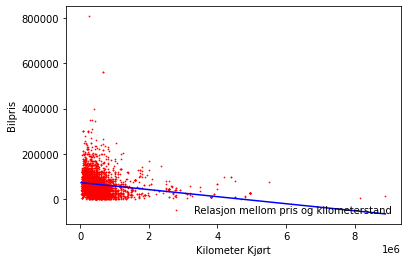

In [8]:
x=np.linspace(min(g['selling_price']), max(g['selling_price']), 100)

regression_line=res.params['intercept']+res.params['selling_price']*x

ax.plot(x, regression_line,color='blue')
fig